In [2]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [3]:
colors = ['red', 'orange', 'green', 'blue', 'purple']
log10ztr_table = [0,1,2,3,4]
log10dr_table = [7, 7.6,8.0 ,8.3]
f_SIDM_table = [0.01, 0.03, 0.05, 0.1]
omega_dcdm_table = np.linspace(0.01, 0.5, 10)
omega_dm_best = 0.12
#'100*theta_s':1.0399625783900215

In [7]:
common_settings_DCDM = {'omega_b':0.0223828,'100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':20.0,'non linear':'halofit', 'ignore CDR at BBN': 'yes','omega_ini_dr':0.001, 'omega_cdm': 0}

common_settings_LCDM = {'omega_b':0.0223828, '100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':10.0,'non linear':'halofit'}

0.12210970260653024
k = 0.02505043780367735
3455.7252675100303
0.12536916168268805
k = 0.025156408003738653
3536.765400838679
0.13355653885045166
k = 0.025420644536382354
3741.6933096344533
0.14151265744500127
k = 0.02567481264736006
3942.8779243421923


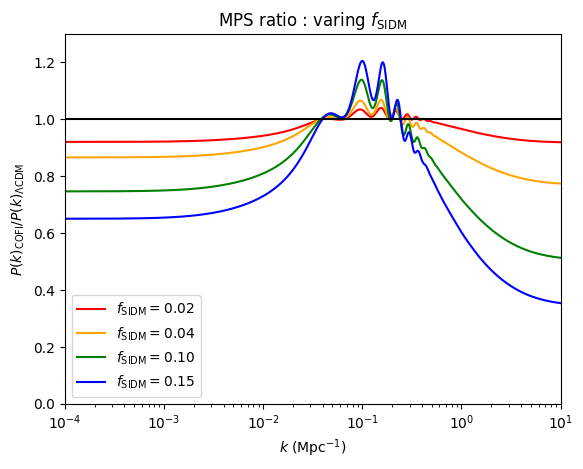

In [6]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(10), 1000)
log10dr_table = [6.5,6.9,7.3 ,7.5]

for i in range(4):
    f = log10dr_table[i]+1

    a_tr = 1/(1+1e4)
    
    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dr': 10**f,'omega_ini_dcdm': 0.12 ,'Gamma_dcdm': 1e5, 'a_tr':1/(1+1e4), 'omega_cdm': 0})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.compute()

    h_COFI = COFI.h()
    h_LCDM = LCDM.h()

    MPS_COFI = np.array([COFI.pk_lin(k*h_COFI, 0)*h_COFI**3 for k in kk])
    MPS_LCDM = np.array([LCDM.pk_lin(k*h_LCDM, 0)*h_LCDM**3 for k in kk])
    zeq = COFI.z_eq()

    omegadr = COFI.omega_dr()
    omegadcdm = COFI.omega_dcdm()
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$f_{\mathrm{SIDM}}=$'+'{:.2f}'.format(omegadr/(omegadcdm+omegadr)))
    print(omegadr + omegadcdm)
    print("k = {}".format(a_tr*COFI.Hubble(1e4)))
    print(zeq)
    
ax.set_xlim(1e-4, 10)
ax.set_ylim(0, 1.3)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 10, color = 'k')
ax.set_title(r'MPS ratio : varing $f_{\mathrm{SIDM}}$')
ax.set_xlabel(r'$k$ (Mpc$^{-1}$)')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k)_{\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_f.pdf")
        

0.11704894574782984
3378.5170709622053
0.11960440121075687
3378.5196471637582
0.11999645593884994
3403.2694323933383
0.12000043908869087
3403.3642415642857


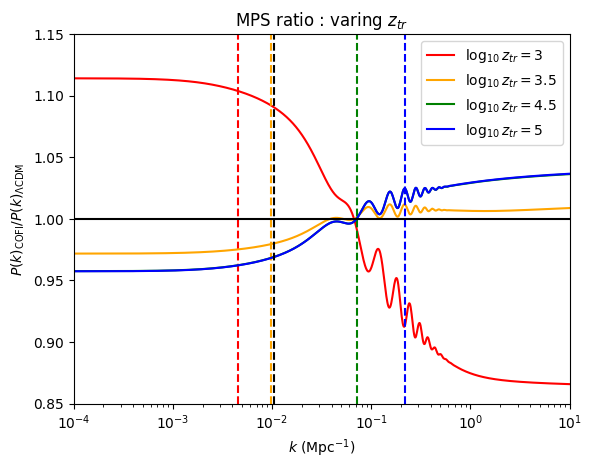

In [6]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(10), 1000)
log10ztr_table = [0,1,2,3,4]

for i in range(5):
    z = 10**log10ztr_table[i]

    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_cdm':0, 'omega_ini_dcdm': 0.12 ,'Gamma_dcdm': 1e5, 'a_tr':1/(1+z)})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.compute()
    omegadr = COFI.omega_dr()
    omegadcdm = COFI.omega_dcdm()
    h_COFI = COFI.h()
    h_LCDM = LCDM.h()
    MPS_COFI = np.array([COFI.pk_lin(k*h_COFI, 0)*h_COFI**3 for k in kk])
    MPS_LCDM = np.array([LCDM.pk_lin(k*h_LCDM, 0)*h_LCDM**3 for k in kk])
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$\log_{10}z_{tr}=$'+'{}'.format(log10ztr_table[i]))
    ax.vlines(COFI.Hubble(z)/(1+z), 0.85, 1.15, color= colors[i], linestyles='dashed')
    print(omegadr + omegadcdm)
    print(COFI.z_eq())
    
ax.set_xlim(1e-4, 10)
ax.set_ylim(0.85, 1.15)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 10, color = 'k')
ax.vlines(COFI.Hubble(3400)/(1+3400), 0.85, 1.15, color = 'k', linestyles='dashed')
ax.set_title(r'MPS ratio : varing $z_{tr}$')
ax.set_xlabel(r'$k$ (Mpc$^{-1}$)')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k)_{\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_ztr.pdf")

0.12000000833226845
0.11999996782607088
0.12003343198752658
0.12000449694614262
0.11995557774826837


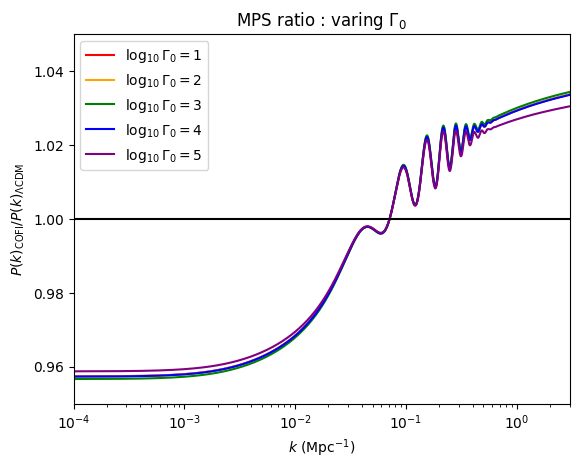

In [20]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)
log10Gamma_table = [1,2,3,4,5]

for i in range(len(log10Gamma_table)):
    Gamma = 10**log10Gamma_table[i]

    COFI = Class()
    COFI.set(common_settings_DCDM)
    COFI.set({'omega_ini_dcdm': 0.12 ,'Gamma_dcdm': Gamma, 'a_tr':1/(1+1e4), 'omega_cdm': 0})
    COFI.compute()
        
    LCDM = Class()
    LCDM.set(common_settings_LCDM)
    LCDM.compute()

    h_COFI = COFI.h()
    h_LCDM = LCDM.h()
    MPS_COFI = np.array([COFI.pk_lin(k*h_COFI, 0)*h_COFI**3 for k in kk])
    MPS_LCDM = np.array([LCDM.pk_lin(k*h_LCDM, 0)*h_LCDM**3 for k in kk])
    print(COFI.omega_dcdm() + COFI.omega_dr())
    
    ax.plot(kk, MPS_COFI/MPS_LCDM, color = colors[i], label = r'$\log_{10}\Gamma_0=$'+'{}'.format(log10Gamma_table[i]))
    
ax.set_xlim(1e-4, 3)
ax.set_ylim(0.950, 1.05)
ax.set_xscale('log')
ax.legend(loc = 0)
ax.hlines(1, 1e-4, 3, color = 'k')
ax.set_title(r'MPS ratio : varing $\Gamma_0$')
ax.set_xlabel(r'$k$ (Mpc$^{-1}$)')
ax.set_ylabel(r'$P(k)_{\mathrm{COFI}}/P(k)_{\Lambda\mathrm{CDM}}$')

fig.savefig("MPS_Gamma.pdf")

0.022421277814250073


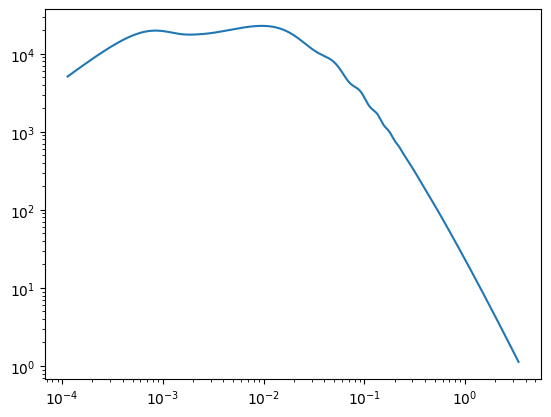

In [9]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)
log10ztr_table = [0,1,2,3,4]
f = open('COFI.txt', 'w')

COFI1 = Class()
COFI1.set(common_settings_DCDM)
COFI1.set({'Gamma_dcdm':1e3, 'a_tr':1/(1+1), 'omega_ini_dcdm':0.12})
COFI1.compute()
h = COFI1.h()

MPS = np.array([COFI1.pk_lin(k*h,0)*h**3 for k in kk])
for i in range(len(MPS)):
    f.write("{}\n".format(MPS[i]))
plt.plot(kk*h, MPS)
plt.xscale('log')
plt.yscale('log')

print(COFI1.omega_dcdmdr())

f.close()

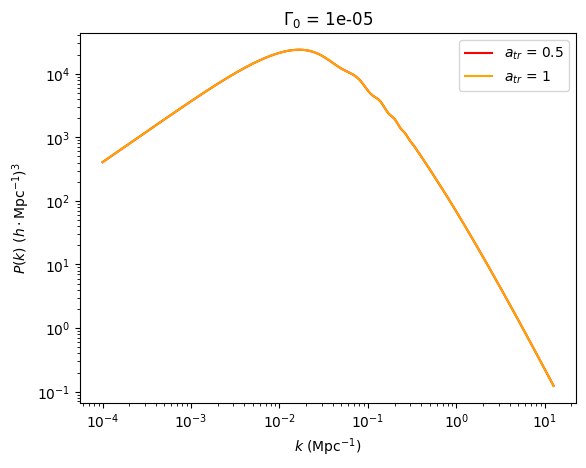

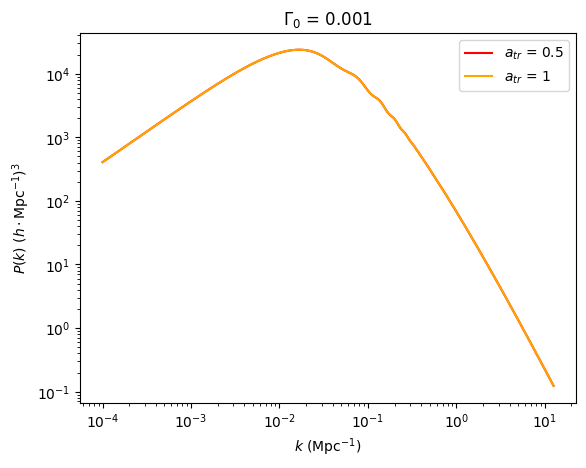

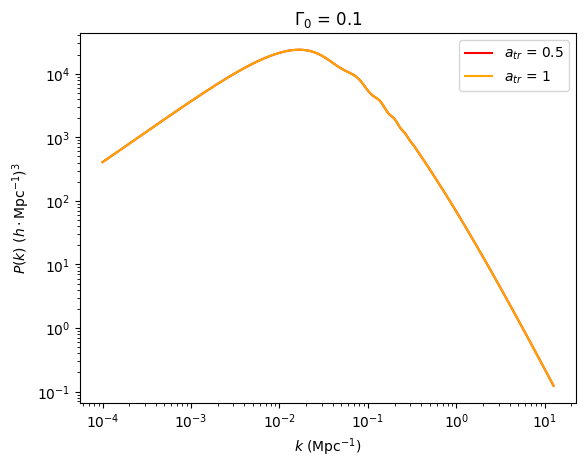

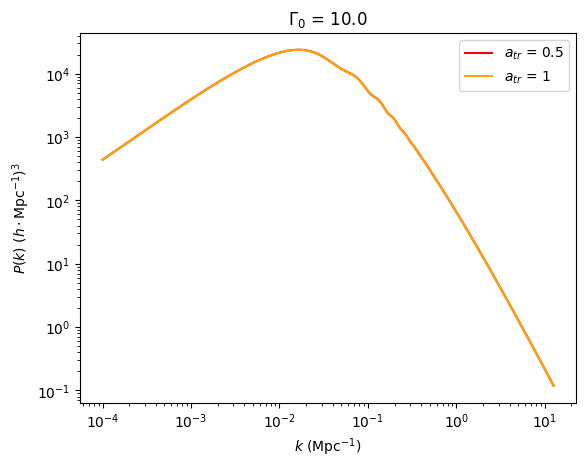

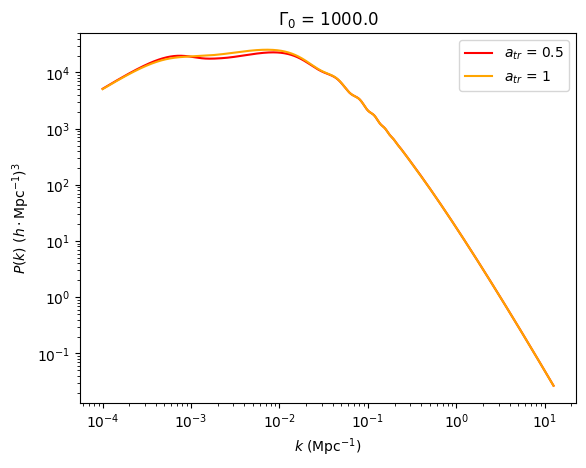

In [17]:
kk = np.logspace(-4, np.log(3), 1000)
atr_table = [1/2,1]
Gamma_table = [1e-5,1e-3, 1e-1, 1e1, 1e3]
for i in range(5):
    fig, ax = plt.subplots()
    for j in range(2):
        COFI = Class()
        COFI.set(common_settings_DCDM)
        COFI.set({'omega_ini_dcdm':0.12, 'a_tr':atr_table[j], 'Gamma_dcdm':Gamma_table[i]})
        COFI.compute()
        h = COFI.h()
        pk = np.array([COFI.pk_lin(k*h, 0)*h**3 for k in kk])
        ax.plot(kk, pk, color = colors[j], label = r'$a_{{tr}}$ = {}'.format(atr_table[j]))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$k$ (Mpc$^{-1}$)')
    ax.set_ylabel(r'$P(k)$ ($h\cdot$Mpc$^{-1}$)$^3$')
    ax.set_title(r'$\Gamma_0$ = {}'.format(Gamma_table[i]))
    ax.legend(loc=0)
    fig.savefig('Gamma = {}.pdf'.format(Gamma_table[i]))
    plt.show()
        